# Feature engineering

## Focus on time of various bids

In [47]:
# import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [48]:
bids = pd.read_csv('Data/bids.csv')
bidder = pd.read_csv('Data/train.csv')

In [49]:
print("BIDDER SHAPE: " + str(bidder.shape))
print("BIDS SHAPE: " + str(bids.shape))

BIDDER SHAPE: (2013, 4)
BIDS SHAPE: (7656334, 9)


In [50]:
print("#BIDDER in bidder dataset: " + str(bidder['bidder_id'].count()))
print("#BIDDER in bids dataset: " + str(bids['bidder_id'].nunique()))

#BIDDER in bidder dataset: 2013
#BIDDER in bids dataset: 6614


#### Make a deep copy of the datasets to check if after all pre-processing the datas still be significant

In [51]:
import copy
bids_copy = copy.deepcopy(bids)
bidder_copy = copy.deepcopy(bidder)

### Encoding
- 'pd.concat()' unisce le colonne bidder_id di bids e bidder.
- 'unique()' restituisce una lista di valori univoci di bidder_id presenti in entrambi i dataset, eliminando duplicati.
- 'enumerate(unique_bidders)' associa un indice numerico (da 0 in poi) a ciascun valore unico di bidder_id.
- Successivamente viene creata la nuova colonna 'encoded_bidder_id' e viene riempita con i valori corrispondenti nella mappa

In [52]:
unique_bidders = pd.concat([bids['bidder_id'], bidder['bidder_id']]).unique()
bidder_mapping = {bidder_id: idx for idx, bidder_id in enumerate(unique_bidders)}
bids['encoded_bidder_id'] = bids['bidder_id'].map(bidder_mapping)
bidder['encoded_bidder_id'] = bidder['bidder_id'].map(bidder_mapping)

### Encode and scale 'time'

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
bids['time'] = scaler.fit_transform(bids[['time']])

#### Drop bidder_id, because 'encoded_bidder_id' feature was created

In [54]:
bids.drop('bidder_id',axis=1,inplace=True)
bidder.drop('bidder_id',axis=1,inplace=True)

In [55]:
bids

,bid_id,auction,merchandise,device,time,country,ip,url,encoded_bidder_id
0,0,ewmzr,jewelry,phone0,0.903226,us,69.166.231.58,vasstdc27m7nks3,0
1,1,aeqok,furniture,phone1,0.903226,in,50.201.125.84,jmqlhflrzwuay9c,1
2,2,wa00e,home goods,phone2,0.903226,py,112.54.208.157,vasstdc27m7nks3,2
3,3,jefix,jewelry,phone4,0.903226,in,18.99.175.133,vasstdc27m7nks3,3
4,4,jefix,jewelry,phone5,0.903226,in,145.138.5.37,vasstdc27m7nks3,4
...,...,...,...,...,...,...,...,...,...
7656329,7656329,3e64w,jewelry,phone91,0.548387,ru,140.204.227.63,cghhmomsaxi6pug,2957
7656330,7656330,xn0y0,mobile,phone236,0.548387,pl,24.232.159.118,wgggpdg2gx5pesn,3380
7656331,7656331,gja6c,sporting goods,phone80,0.548387,za,80.237.28.246,5xgysg14grlersa,2955
7656332,7656332,hmwk8,jewelry,phone349,0.548387,my,91.162.27.152,bhtrek44bzi2wfl,3049


In [56]:
bidder

,payment_account,address,outcome,encoded_bidder_id
0,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,1309
1,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,2397
2,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,2514
3,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,6527
4,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,238
...,...,...,...,...
2008,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,4823
2009,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,6495
2010,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2209
2011,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,5380


In [57]:
print("BIDDER SHAPE: " + str(bidder.shape) + " - " + str(bidder_copy.shape))
print("BIDS SHAPE: " + str(bids.shape) + " - " + str(bids_copy.shape))

BIDDER SHAPE: (2013, 4) - (2013, 4)
BIDS SHAPE: (7656334, 9) - (7656334, 9)


## AGGREGATE FEATURES

In [58]:
# fill contry with the mode.
bids['country'].fillna(bids['country'].mode()[0], inplace = True)   

### Counting features

In [59]:
count_for_bidder = bids.groupby("encoded_bidder_id").nunique().rename(columns={
    'bid_id': 'N_bids', 
    'auction': 'N_auctions', 
    'merchandise': 'N_merchandise', 
    'device': 'N_device', 
    'time': 'N_time', 
    'country': 'N_country', 
    'ip': 'N_ip', 
    'url': 'N_url'
}).reset_index()

bids = bids.merge(count_for_bidder, on="encoded_bidder_id", how="left")


In [60]:
bids['bids/url'] = bids['N_bids'] / bids['N_url']
bids['bids/ip'] = bids['N_bids'] / bids['N_ip']
bids['bids/auctions'] = bids['N_bids'] / bids['N_auctions']
bids['bids/country'] = bids['N_bids'] / bids['N_country']
bids['bids/device'] = bids['N_bids'] / bids['N_device']

In [61]:
bids.head(10)

,bid_id,auction,merchandise,device,time,country,ip,url,encoded_bidder_id,N_bids,...,N_device,N_time,N_country,N_ip,N_url,bids/url,bids/ip,bids/auctions,bids/country,bids/device
0,0,ewmzr,jewelry,phone0,0.903226,us,69.166.231.58,vasstdc27m7nks3,0,62529,...,1405,51779,122,21741,16842,3.712683,2.876087,76.069343,512.532787,44.504626
1,1,aeqok,furniture,phone1,0.903226,in,50.201.125.84,jmqlhflrzwuay9c,1,19988,...,1029,18961,153,10316,4527,4.415286,1.937573,33.649832,130.640523,19.424684
2,2,wa00e,home goods,phone2,0.903226,py,112.54.208.157,vasstdc27m7nks3,2,105436,...,964,82783,136,51891,13360,7.891916,2.031875,130.328801,775.264706,109.373444
3,3,jefix,jewelry,phone4,0.903226,in,18.99.175.133,vasstdc27m7nks3,3,10956,...,505,10679,64,6296,2479,4.419524,1.740152,58.276596,171.187500,21.695050
4,4,jefix,jewelry,phone5,0.903226,in,145.138.5.37,vasstdc27m7nks3,4,12888,...,635,12499,76,9240,1781,7.236384,1.394805,73.227273,169.578947,20.296063
5,5,3vi4t,mobile,phone7,0.903226,ru,91.107.221.27,vasstdc27m7nks3,5,30062,...,403,27969,125,20492,295,101.905085,1.467012,38.198221,240.496000,74.595533
6,6,kjlzx,mobile,phone2,0.903227,th,152.235.155.159,j9nl1xmo6fqhcc6,6,893,...,170,892,25,741,329,2.714286,1.205128,4.022523,35.720000,5.252941
7,7,f5f6k,home goods,phone8,0.903227,id,3.210.112.183,hnt6hu93a3z1cpc,7,6,...,4,6,1,6,3,2.000000,1.000000,1.000000,6.000000,1.500000
8,8,h7jjx,home goods,phone9,0.903227,th,103.64.157.225,vasstdc27m7nks3,8,3599,...,341,3569,17,3149,13,276.846154,1.142903,16.066964,211.705882,10.554252
9,9,3zpkj,sporting goods,phone4,0.903227,za,123.28.123.226,vasstdc27m7nks3,9,192565,...,2020,122781,76,53405,36518,5.273153,3.605749,257.439840,2533.750000,95.329208


### Add the average number of bids a user placed per referring URL

In [62]:
# Label Encoding for url
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bids["url"] = encoder.fit_transform(bids['url'])

# From the bids dataset, group by bidder_id and url and count number of bids for every group
bids_per_url_train = bids.groupby(['encoded_bidder_id', 'url'])['bid_id'].count().reset_index(name='bid_count')

# Calculate the mean
average_bids_per_user_train = bids_per_url_train.groupby('encoded_bidder_id')['bid_count'].mean().reset_index(name='avg_bids_per_url')

In [63]:
average_bids_per_user_train

,encoded_bidder_id,avg_bids_per_url
0,0,3.712683
1,1,4.415286
2,2,7.891916
3,3,4.419524
4,4,7.236384
...,...,...
6609,6609,1.000000
6610,6610,1.000000
6611,6611,1.000000
6612,6612,1.000000


### Add the mean of the per-auction URL entropy
- Higher values of entropy suggest that the bidder's bidding behavior is spread across different auctions/URLs with a more uniform distribution.
- Lower values of entropy suggest that the bidder's activity is concentrated in specific auctions or URLs.

In [64]:
# Label Encoding for auction
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bids["auction"] = encoder.fit_transform(bids['auction'])

# Group by bidder_id and auction and count number of url for every group
bids_per_auction_url_train = bids.groupby(['encoded_bidder_id', 'auction'])['url'].count().reset_index(name='url_per_auction_count')

def calculate_entropy(values):
	total = sum(values)
	probabilities = [count / total for count in values]
	return -sum(p * np.log2(p) for p in probabilities if p > 0)

# Calculate entropy for each bidder per auction
bids_per_auction_url_entropy_train = (
	bids_per_auction_url_train.groupby(['encoded_bidder_id'])['url_per_auction_count']
	.apply(calculate_entropy)
	.reset_index(name='url_entropy_per_auction')
)

In [65]:
bids_per_auction_url_entropy_train

,encoded_bidder_id,url_entropy_per_auction
0,0,6.158347
1,1,5.696760
2,2,6.494542
3,3,2.407953
4,4,2.440489
...,...,...
6609,6609,-0.000000
6610,6610,-0.000000
6611,6611,-0.000000
6612,6612,-0.000000


## FEATURE CONCERN SINGLE BID

### Add time_since_last_bid
Tempo trascorso dalla bid precedente nella stessa asta.

In [66]:
# Order bids by encoded_bidder_id, auction, and then by time
bids_ordered_by_time = bids.sort_values(by=['encoded_bidder_id', 'auction', 'time'])

# Calculate the difference between every bids in the same auction for each bidder
bids_ordered_by_time['time_since_last_bid'] = bids_ordered_by_time.groupby(['encoded_bidder_id', 'auction'])['time'].diff()

# First bid has Nan value, because it is the starting bid
bids_ordered_by_time['time_since_last_bid'] = bids_ordered_by_time['time_since_last_bid'].fillna(0)

# Maintain only the new column
bids_ordered_by_time = bids_ordered_by_time[['bid_id', 'time_since_last_bid']]

print("BIDS ORDERED BY TIME DATASET SHAPE: " + str(bids_ordered_by_time.shape))
bids_ordered_by_time

BIDS ORDERED BY TIME DATASET SHAPE: (7656334, 2)


,bid_id,time_since_last_bid
188711,188711,0.000000
524790,524790,0.017027
690113,690113,0.007625
906485,906485,0.006253
1297288,1297288,0.018804
...,...,...
7635939,7635939,0.000000
7637097,7637097,0.000000
7639758,7639758,0.000000
7651414,7651414,0.000000


### Time until auction end
- Calculate the time between the actual bid and the end of the auction (end of aucion = time of last bid of the auction)

In [67]:
# Group every bids by auction and take the max of the time as the end of the auction
auction_end_times = bids.groupby('auction')['time'].max().reset_index()
auction_end_times.rename(columns={'time': 'auction_end_time'}, inplace=True)
print("AUCTION END TIMES DATASET SHAPE: " + str(auction_end_times.shape))

# Merge on auction
bids_from_auction_end = bids.merge(auction_end_times, on='auction', how='left')
print("BIDS END TIMES DATASET SHAPE: " + str(bids_from_auction_end.shape))

# Calculate the distance from the last bid in the auction
bids_from_auction_end = bids_from_auction_end[['bid_id', 'auction_end_time', 'time']]
bids_from_auction_end['time_until_auction_end'] = bids_from_auction_end['auction_end_time'] - bids_from_auction_end['time']

# Drop 'auction_end_time' column
bids_from_auction_end = bids_from_auction_end.drop(['auction_end_time', 'time'], axis=1)

bids_from_auction_end

AUCTION END TIMES DATASET SHAPE: (15051, 2)
BIDS END TIMES DATASET SHAPE: (7656334, 23)


,bid_id,time_until_auction_end
0,0,0.096696
1,1,0.096772
2,2,0.096748
3,3,0.096774
4,4,0.096774
...,...,...
7656329,7656329,0.000000
7656330,7656330,0.000000
7656331,7656331,0.000000
7656332,7656332,0.000000


### Time entropy per auction
- Time entropy measures the unpredictability or randomness of bid placements within an auction
- A high entropy value suggests random or unpredictable bid timing (which might indicate a bot), while a low entropy means bids follow a pattern (which is more human-like).

In [68]:
# Compute time differences per auction
bids_sorted_by_time = bids.sort_values(by=['auction', 'time'])
bids_sorted_by_time['time_diff'] = bids_sorted_by_time.groupby('auction')['time'].diff().fillna(0)

# Compute time probability distribution per auction
def compute_entropy(time_diffs):
	if len(time_diffs) <= 1:
		return 0  # If there's only 1 bid, entropy is 0
	probs = time_diffs / time_diffs.sum()  # Normalize to get probabilities
	entropy = -np.sum(probs * np.log2(probs + 1e-9))  # Compute entropy (avoid log(0) error)
	return entropy

# Apply entropy function to each auction
auction_entropy = bids_sorted_by_time.groupby('auction')
auction_entropy = auction_entropy['time_diff'].apply(compute_entropy).reset_index()
auction_entropy.rename(columns={'time_diff': 'time_entropy'}, inplace=True)

# Merge entropy values back into the original bids dataset
bids_sorted_by_time = bids.merge(auction_entropy, on='auction', how='left')
print("BIDS SORTED BY TIME DATASET SHAPE: " + str(bids_sorted_by_time.shape))

bids_time_entropy = bids_sorted_by_time[['bid_id', 'time_entropy']]
bids_time_entropy

BIDS SORTED BY TIME DATASET SHAPE: (7656334, 23)


,bid_id,time_entropy
0,0,10.668364
1,1,12.499526
2,2,7.042982
3,3,16.773118
4,4,16.773118
...,...,...
7656329,7656329,5.390230
7656330,7656330,4.747517
7656331,7656331,5.610058
7656332,7656332,2.648737


### Bidding speed
- Difference of time between the bids of a same bidder inside an auction

In [69]:
# Sort by time within each bidder and auction
bids_sorted_per_time = bids.sort_values(by=['encoded_bidder_id', 'auction', 'time'])

# Compute bidding speed
bids_sorted_per_time['bidding_speed'] = bids_sorted_per_time.groupby(['encoded_bidder_id', 'auction'])['time'].diff().fillna(0)

# Print dataset shape
print("BIDS 'BIDDING SPEED' DATASET SHAPE: " + str(bids_sorted_per_time.shape))
bids_sorted_per_time = bids_sorted_per_time[['bid_id', 'bidding_speed']]
bids_sorted_per_time

BIDS 'BIDDING SPEED' DATASET SHAPE: (7656334, 23)


,bid_id,bidding_speed
188711,188711,0.000000
524790,524790,0.017027
690113,690113,0.007625
906485,906485,0.006253
1297288,1297288,0.018804
...,...,...
7635939,7635939,0.000000
7637097,7637097,0.000000
7639758,7639758,0.000000
7651414,7651414,0.000000


### Concurrent bids
- '1' if a bidder is placed at the same of another 
- '0' otherwise

In [70]:
print("UNIQUE VALUES OF TIME: " + str(bids['time'].nunique()))

concurrent_bids = bids.copy()

# Count how many bids have been made in the same time, respect to the auction
concurrent_bids['concurrent_bid'] = bids.groupby(['time', 'encoded_bidder_id'])['bid_id'].transform('count')

# if at least 2 cuncurrent bids, concurrent_bid = 1, else 0
concurrent_bids['concurrent_bid'] = (concurrent_bids['concurrent_bid'] > 1).astype(int)

concurrent_bids = concurrent_bids[['bid_id', 'concurrent_bid']]
concurrent_bids

UNIQUE VALUES OF TIME: 776529


,bid_id,concurrent_bid
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
7656329,7656329,0
7656330,7656330,0
7656331,7656331,0
7656332,7656332,0


### Winning bid in an auction
- if a bid is the last of an auction, is the winning one (1), else no (0)

In [71]:
winning_bids = bids.sort_values(by=['auction', 'time'])

# Take the last bid for every auction
max_times = winning_bids.groupby('auction')['time'].transform('max')

# If is the last 1, else 0
winning_bids['winning_bid'] = (winning_bids['time'] == max_times).astype(int)

winning_bids = winning_bids[['bid_id', 'winning_bid']]
winning_bids


,bid_id,winning_bid
5826422,5826422,0
5834284,5834284,0
5850448,5850448,0
5884054,5884054,0
5898318,5898318,0
...,...,...
7646305,7646305,0
7648070,7648070,0
7648153,7648153,0
7649363,7649363,0


### Percentile, quantile

In [72]:
# Calculate quantilies 
quantiles = bids.groupby('auction')['time'].quantile([0.5, 0.75]).unstack()
quantiles.columns = ['median_time', 'q3_time']

bids_quantilies = bids.merge(quantiles, on='auction', how='left')

# Creare le colonne di classificazione
bids_quantilies['first_half'] = (bids_quantilies['time'] <= bids_quantilies['median_time']).astype(int)
bids_quantilies['third_quantile'] = (bids_quantilies['time'] > bids_quantilies['q3_time']).astype(int)

# Create new dataset
bids_quantilies = bids_quantilies[['bid_id', 'first_half', 'third_quantile']]
bids_quantilies


,bid_id,first_half,third_quantile
0,0,1,0
1,1,1,0
2,2,1,0
3,3,1,0
4,4,1,0
...,...,...,...
7656329,7656329,0,1
7656330,7656330,0,1
7656331,7656331,0,1
7656332,7656332,0,1


## Remove outliers
- Remove bidder with only 1 bid 

In [73]:
# import matplotlib.pyplot as plt

# # Sort bidder and remove duplicates because we are in the bids dataset
# bids_per_bidder = bids[['encoded_bidder_id', 'N_bids']].drop_duplicates().sort_values(by='N_bids', ascending=False)

# # Plot graph
# plt.figure(figsize=(12, 6))
# plt.bar(bids_per_bidder['encoded_bidder_id'], bids_per_bidder['N_bids'], color='royalblue', alpha=0.7)
# plt.xlabel("Encoded Bidder ID", fontsize=12)
# plt.ylabel("N. of Bid", fontsize=12)
# plt.xticks([])  # Nasconde gli ID se sono troppi
# plt.ylim(0, 120000)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


In [74]:
# bids = bids[bids["N_bids"] > 1]
# bids

## Join new features extracted with bids dataset

In [75]:
from functools import reduce

# List of DataFrames to merge
dataframes_to_merge = [average_bids_per_user_train, bids_per_auction_url_entropy_train]

# Merge all DataFrames on a common column
for df_to_merge in dataframes_to_merge:
	bids = pd.merge(bids, df_to_merge, on='encoded_bidder_id', how='outer')

In [76]:
bids.head(10)

,bid_id,auction,merchandise,device,time,country,ip,url,encoded_bidder_id,N_bids,...,N_country,N_ip,N_url,bids/url,bids/ip,bids/auctions,bids/country,bids/device,avg_bids_per_url,url_entropy_per_auction
0,0,6242,jewelry,phone0,0.903226,us,69.166.231.58,1553590,0,62529,...,122,21741,16842,3.712683,2.876087,76.069343,512.532787,44.504626,3.712683,6.158347
1,14,13552,jewelry,phone15,0.903227,au,134.243.148.253,1553590,0,62529,...,122,21741,16842,3.712683,2.876087,76.069343,512.532787,44.504626,3.712683,6.158347
2,106,7590,jewelry,phone80,0.903230,ke,227.231.81.211,1542107,0,62529,...,122,21741,16842,3.712683,2.876087,76.069343,512.532787,44.504626,3.712683,6.158347
3,152,12961,jewelry,phone41,0.903232,iq,140.231.164.76,1656691,0,62529,...,122,21741,16842,3.712683,2.876087,76.069343,512.532787,44.504626,3.712683,6.158347
4,155,10996,jewelry,phone102,0.903232,za,187.81.242.103,715635,0,62529,...,122,21741,16842,3.712683,2.876087,76.069343,512.532787,44.504626,3.712683,6.158347
5,169,11039,jewelry,phone5,0.903232,in,13.136.161.106,1553590,0,62529,...,122,21741,16842,3.712683,2.876087,76.069343,512.532787,44.504626,3.712683,6.158347
6,224,6625,jewelry,phone4,0.903235,in,153.47.226.142,1553590,0,62529,...,122,21741,16842,3.712683,2.876087,76.069343,512.532787,44.504626,3.712683,6.158347
7,366,7795,jewelry,phone4,0.903240,ke,207.97.126.108,1553590,0,62529,...,122,21741,16842,3.712683,2.876087,76.069343,512.532787,44.504626,3.712683,6.158347
8,421,6242,jewelry,phone0,0.903242,us,69.166.231.58,1553590,0,62529,...,122,21741,16842,3.712683,2.876087,76.069343,512.532787,44.504626,3.712683,6.158347
9,422,1165,jewelry,phone46,0.903242,iq,140.231.164.76,883533,0,62529,...,122,21741,16842,3.712683,2.876087,76.069343,512.532787,44.504626,3.712683,6.158347


In [77]:
from functools import reduce

dfs = [bids_ordered_by_time, bids_from_auction_end, bids_time_entropy, bids_sorted_per_time, concurrent_bids, winning_bids, bids_quantilies]

for df_to_merge in dfs:
	bids = bids.merge(df_to_merge, on='bid_id', how='inner')
	
bids

,bid_id,auction,merchandise,device,time,country,ip,url,encoded_bidder_id,N_bids,...,avg_bids_per_url,url_entropy_per_auction,time_since_last_bid,time_until_auction_end,time_entropy,bidding_speed,concurrent_bid,winning_bid,first_half,third_quantile
0,0,6242,jewelry,phone0,0.903226,us,69.166.231.58,1553590,0,62529,...,3.712683,6.158347,0.0,0.096696,10.668364,0.0,0,0,1,0
1,14,13552,jewelry,phone15,0.903227,au,134.243.148.253,1553590,0,62529,...,3.712683,6.158347,0.0,0.090733,1.090621,0.0,0,0,1,0
2,106,7590,jewelry,phone80,0.903230,ke,227.231.81.211,1542107,0,62529,...,3.712683,6.158347,0.0,0.096737,8.587159,0.0,0,0,1,0
3,152,12961,jewelry,phone41,0.903232,iq,140.231.164.76,1656691,0,62529,...,3.712683,6.158347,0.0,0.096763,11.269246,0.0,0,0,1,0
4,155,10996,jewelry,phone102,0.903232,za,187.81.242.103,715635,0,62529,...,3.712683,6.158347,0.0,0.059708,8.000006,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7656329,7635939,12959,jewelry,phone771,0.547726,my,0.159.159.71,1201661,6609,1,...,1.000000,-0.000000,0.0,0.000000,3.106137,0.0,0,1,0,1
7656330,7637097,8324,jewelry,phone15,0.547763,id,221.143.27.57,1269224,6610,1,...,1.000000,-0.000000,0.0,0.000624,7.300763,0.0,0,0,0,1
7656331,7639758,5425,sporting goods,phone142,0.547850,in,108.54.134.235,1657160,6611,1,...,1.000000,-0.000000,0.0,0.000535,7.699601,0.0,0,0,0,1
7656332,7651414,14279,mobile,phone21,0.548235,in,95.158.193.99,1308191,6612,1,...,1.000000,-0.000000,0.0,0.000148,9.857199,0.0,0,0,0,1


### Check of consinstance

In [78]:
print("BIDDER SHAPE: " + str(bidder.shape) + " - " + str(bidder_copy.shape))
print("BIDS SHAPE: " + str(bids.shape) + " - " + str(bids_copy.shape))

print("#BIDDER in bidder dataset: " + str(bids['encoded_bidder_id'].count()))
print("#BIDDER in bids dataset: " + str(bids['encoded_bidder_id'].nunique()))

BIDDER SHAPE: (2013, 4) - (2013, 4)
BIDS SHAPE: (7656334, 32) - (7656334, 9)
#BIDDER in bidder dataset: 7656334
#BIDDER in bids dataset: 6614


## Training and test with new features

### First:
- encode features

In [79]:
# Encoding 'merchandise'
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bids["merchandise"] = encoder.fit_transform(bids['merchandise'])
bids["country"] = encoder.fit_transform(bids['country'])
bids["ip"] = encoder.fit_transform(bids['ip'])
bids["device"] = encoder.fit_transform(bids['device'])

bids


,bid_id,auction,merchandise,device,time,country,ip,url,encoded_bidder_id,N_bids,...,avg_bids_per_url,url_entropy_per_auction,time_since_last_bid,time_until_auction_end,time_entropy,bidding_speed,concurrent_bid,winning_bid,first_half,third_quantile
0,0,6242,6,0,0.903226,186,2000621,1553590,0,62529,...,3.712683,6.158347,0.0,0.096696,10.668364,0.0,0,0,1,0
1,14,13552,6,557,0.903227,10,365157,1553590,0,62529,...,3.712683,6.158347,0.0,0.090733,1.090621,0.0,0,0,1,0
2,106,7590,6,7130,0.903230,93,1292416,1542107,0,62529,...,3.712683,6.158347,0.0,0.096737,8.587159,0.0,0,0,1,0
3,152,12961,6,3434,0.903232,85,428201,1656691,0,62529,...,3.712683,6.158347,0.0,0.096763,11.269246,0.0,0,0,1,0
4,155,10996,6,25,0.903232,195,890119,715635,0,62529,...,3.712683,6.158347,0.0,0.059708,8.000006,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7656329,7635939,12959,6,7098,0.547726,127,2355,1201661,6609,1,...,1.000000,-0.000000,0.0,0.000000,3.106137,0.0,0,1,0,1
7656330,7637097,8324,6,557,0.547763,81,1235073,1269224,6610,1,...,1.000000,-0.000000,0.0,0.000624,7.300763,0.0,0,0,0,1
7656331,7639758,5425,9,469,0.547850,84,106067,1657160,6611,1,...,1.000000,-0.000000,0.0,0.000535,7.699601,0.0,0,0,0,1
7656332,7651414,14279,7,1223,0.548235,84,2261238,1308191,6612,1,...,1.000000,-0.000000,0.0,0.000148,9.857199,0.0,0,0,0,1


### Check if there are any Nan in 'bids'

In [80]:
bids.dropna(inplace = True)
bids

,bid_id,auction,merchandise,device,time,country,ip,url,encoded_bidder_id,N_bids,...,avg_bids_per_url,url_entropy_per_auction,time_since_last_bid,time_until_auction_end,time_entropy,bidding_speed,concurrent_bid,winning_bid,first_half,third_quantile
0,0,6242,6,0,0.903226,186,2000621,1553590,0,62529,...,3.712683,6.158347,0.0,0.096696,10.668364,0.0,0,0,1,0
1,14,13552,6,557,0.903227,10,365157,1553590,0,62529,...,3.712683,6.158347,0.0,0.090733,1.090621,0.0,0,0,1,0
2,106,7590,6,7130,0.903230,93,1292416,1542107,0,62529,...,3.712683,6.158347,0.0,0.096737,8.587159,0.0,0,0,1,0
3,152,12961,6,3434,0.903232,85,428201,1656691,0,62529,...,3.712683,6.158347,0.0,0.096763,11.269246,0.0,0,0,1,0
4,155,10996,6,25,0.903232,195,890119,715635,0,62529,...,3.712683,6.158347,0.0,0.059708,8.000006,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7656329,7635939,12959,6,7098,0.547726,127,2355,1201661,6609,1,...,1.000000,-0.000000,0.0,0.000000,3.106137,0.0,0,1,0,1
7656330,7637097,8324,6,557,0.547763,81,1235073,1269224,6610,1,...,1.000000,-0.000000,0.0,0.000624,7.300763,0.0,0,0,0,1
7656331,7639758,5425,9,469,0.547850,84,106067,1657160,6611,1,...,1.000000,-0.000000,0.0,0.000535,7.699601,0.0,0,0,0,1
7656332,7651414,14279,7,1223,0.548235,84,2261238,1308191,6612,1,...,1.000000,-0.000000,0.0,0.000148,9.857199,0.0,0,0,0,1


### Then:
- split dataset

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Convert 'outcome' in dataset 'bidder' in type int
bidder['outcome'] = bidder['outcome'].astype(int)

# First split data in the bidder csv, to avoid to separate bidder splitting on the bids
X_bidder = bidder.drop(['outcome', 'address', 'payment_account'],axis=1)
y_bidder = bidder['outcome']

X_train_bidder, X_val_bidder, y_train_bidder, y_val_bidder = train_test_split(X_bidder, y_bidder, test_size=0.3, random_state=42, stratify=y_bidder)

df_train = pd.merge(bids, pd.concat([X_train_bidder, y_train_bidder], axis=1), on='encoded_bidder_id', how='inner')
df_val = pd.merge(bids, pd.concat([X_val_bidder, y_val_bidder], axis=1), on='encoded_bidder_id', how='inner')

# if i put 'left' on the merge my total lenght of (train + val) / 2 should return the same value of the original 'bids' length --> ho controllato ed è cosi
print("Controll correctness: ")
print("'Bids' length before split: " + str(bids.shape[0]))
print("'Bids' length after split: " + str(df_train.shape[0] + df_val.shape[0]))


Controll correctness: 
'Bids' length before split: 7656334
'Bids' length after split: 3071224


### Controll correctness
- 'Bids' length before split: 7656334
- 'Bids' length after split: 3071224

That means that some bidders do not have bids.

### Check for null

In [82]:
# Check for null
for column_train, column_val in zip(df_train.columns, df_val.columns):
	if df_train[column_train].isnull().sum() > 0:
		print("!NULL!" + str(column_train) + " - Train")
	if df_val[column_val].isnull().sum() > 0:
		print("!NULL!" + str(column_val) + " - Val")

### Print datasets

In [83]:
print("TRAIN DATASET: ")
print(df_train.head(10))
print("\n---------\n")
print("VALIDATION DATASET: ")
print(df_val.head(10))

TRAIN DATASET: 
   bid_id  auction  merchandise  device      time  country       ip      url  \
0       1     4307            4       1  0.903226       84  1821800   974753   
1      25     1293            4    3323  0.903227       15   493719  1553590   
2      39     4307            4    2774  0.903228       84  2061457   906375   
3      42     8253            4    3104  0.903228       84  1174792  1395868   
4      68     7225            4    5170  0.903229       84   363281    70211   
5      85     4307            4    5170  0.903230       81  2091086  1216848   
6     140     7225            4    7285  0.903232       84   864139   230943   
7     168      511            4    3323  0.903232       84  2190265  1553590   
8     225     9036            4    2219  0.903235       25  1298775  1553590   
9     239     1293            4    3874  0.903235       84   802531  1666401   

   encoded_bidder_id  N_bids  ...  url_entropy_per_auction  \
0                  1   19988  ...        

## Another Feature Engineering, regarding outcome

In [84]:
print("Train size" + str(df_train.shape))
print("Validation size" + str(df_val.shape))

print("FEATURES TRAIN: " + str(df_train.columns))
print("FEATURES VAL: " + str(df_val.columns))

Train size(2197660, 33)
Validation size(873564, 33)
FEATURES TRAIN: Index(['bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip',
       'url', 'encoded_bidder_id', 'N_bids', 'N_auctions', 'N_merchandise',
       'N_device', 'N_time', 'N_country', 'N_ip', 'N_url', 'bids/url',
       'bids/ip', 'bids/auctions', 'bids/country', 'bids/device',
       'avg_bids_per_url', 'url_entropy_per_auction', 'time_since_last_bid',
       'time_until_auction_end', 'time_entropy', 'bidding_speed',
       'concurrent_bid', 'winning_bid', 'first_half', 'third_quantile',
       'outcome'],
      dtype='object')
FEATURES VAL: Index(['bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip',
       'url', 'encoded_bidder_id', 'N_bids', 'N_auctions', 'N_merchandise',
       'N_device', 'N_time', 'N_country', 'N_ip', 'N_url', 'bids/url',
       'bids/ip', 'bids/auctions', 'bids/country', 'bids/device',
       'avg_bids_per_url', 'url_entropy_per_auction', 'time_since_last_bid',
   

### Probability for a device/ip/url to be used by a bot, regarding every bid

In [85]:
# Function to calculate bot probability based on a given feature (device, url, or ip)
def calculate_feature_bot_probability(bids, feature):
	# Count total bids per feature (device, url, or ip)
	feature_total_bids = bids.groupby(feature)["bid_id"].count().reset_index()
	feature_total_bids = feature_total_bids.rename(columns={"bid_id": "total_bids"})

	# Count bot bids per feature (where outcome == 1)
	feature_bot_bids = bids[bids["outcome"] == 1].groupby(feature)["bid_id"].count().reset_index()
	feature_bot_bids = feature_bot_bids.rename(columns={"bid_id": "bot_bids"})

	# Merge total bids and bot bids
	feature_prob = feature_total_bids.merge(feature_bot_bids, on=feature, how="left").fillna(0)

	# Compute probability: P(bot | feature) = bot_bids / total_bids
	feature_prob[f"{feature}_bot_probability"] = feature_prob["bot_bids"] / feature_prob["total_bids"]

	# Merge back into original dataset
	bids = bids.merge(feature_prob[[feature, f"{feature}_bot_probability"]], on=feature, how="left")
	
	return bids

# Apply the function to df_train for "device", "url", and "ip"
df_train = calculate_feature_bot_probability(df_train, "device")
df_train = calculate_feature_bot_probability(df_train, "url")
df_train = calculate_feature_bot_probability(df_train, "ip")
df_train = calculate_feature_bot_probability(df_train, "auction")
df_train = calculate_feature_bot_probability(df_train, "merchandise")
df_train = calculate_feature_bot_probability(df_train, "country")

# Apply the function to df_val for "device", "url", and "ip"
df_val = calculate_feature_bot_probability(df_val, "device")
df_val = calculate_feature_bot_probability(df_val, "url")
df_val = calculate_feature_bot_probability(df_val, "ip")
df_val = calculate_feature_bot_probability(df_val, "auction")
df_val = calculate_feature_bot_probability(df_val, "merchandise")
df_val = calculate_feature_bot_probability(df_val, "country")

# Show the results for both datasets
print(df_train.head())
print(df_val.head())


   bid_id  auction  merchandise  device      time  country       ip      url  \
0       1     4307            4       1  0.903226       84  1821800   974753   
1      25     1293            4    3323  0.903227       15   493719  1553590   
2      39     4307            4    2774  0.903228       84  2061457   906375   
3      42     8253            4    3104  0.903228       84  1174792  1395868   
4      68     7225            4    5170  0.903229       84   363281    70211   

   encoded_bidder_id  N_bids  ...  winning_bid  first_half  third_quantile  \
0                  1   19988  ...            0           1               0   
1                  1   19988  ...            0           1               0   
2                  1   19988  ...            0           1               0   
3                  1   19988  ...            0           1               0   
4                  1   19988  ...            0           1               0   

   outcome  device_bot_probability  url_bot_probab

### Drop 'bid_id' and 'encoded_bidder_id'

In [86]:
# First save 'encoded_bidder_id' column
df_train_encoded_bidder_id = df_train[['encoded_bidder_id']]
df_val_encoded_bidder_id = df_val[['encoded_bidder_id']]

df_train.drop(['encoded_bidder_id'],axis=1, inplace=True)
df_val.drop(['encoded_bidder_id'],axis=1, inplace=True)

# bids.drop(["bid_id", "time", "merchandise", "country", "ip", "device", "url", "auction"], axis=1, inplace=True)
df_train.drop(["bid_id", "time"], axis=1, inplace=True)
df_val.drop(["bid_id", "time"], axis=1, inplace=True)

## Start test

### Split

In [88]:
X_train = df_train.drop(['outcome'],axis=1)
y_train = df_train['outcome']
X_val = df_val.drop(['outcome'],axis=1)
y_val = df_val['outcome']

print(X_train.head(10))
print(X_val.head(10))

   auction  merchandise  device  country       ip      url  N_bids  \
0     4307            4       1       84  1821800   974753   19988   
1     1293            4    3323       15   493719  1553590   19988   
2     4307            4    2774       84  2061457   906375   19988   
3     8253            4    3104       84  1174792  1395868   19988   
4     7225            4    5170       84   363281    70211   19988   
5     4307            4    5170       81  2091086  1216848   19988   
6     7225            4    7285       84   864139   230943   19988   
7      511            4    3323       84  2190265  1553590   19988   
8     9036            4    2219       25  1298775  1553590   19988   
9     1293            4    3874       84   802531  1666401   19988   

   N_auctions  N_merchandise  N_device  ...  concurrent_bid  winning_bid  \
0         594              1      1029  ...               0            0   
1         594              1      1029  ...               0            0   
2

## Feature Selection

In [43]:
# n_features = X_train.shape[1]

# best_model = None
# best_score = 0
# best_features = []

# all_features = list(range(n_features))

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score

# while n_features > 0:
# 	best = 0
# 	best_feature = None
# 	selected_features = best_features.copy()  # Mantieni le migliori feature selezionate fino a quel punto

# 	for feature in all_features:
# 		if feature not in selected_features:
# 			current_features = selected_features + [feature]
# 			model = RandomForestClassifier(n_estimators=5, random_state=42)
			
# 			model.fit(X_train.iloc[:, current_features], y_train)
# 			y_pred = model.predict(X_val.iloc[:, current_features])    

# 			# max recall
# 			#score = recall_score(y_validation, y_pred, average='weighted')

# 			# max auc score
# 			y_probs = model.predict_proba(X_val.iloc[:, current_features])
# 			score = roc_auc_score(y_val, y_probs[:, 1])

# 			# max f1
# 			#score = f1_score(y_validation, y_pred, average='weighted')

# 			if score > best:
# 				best = score
# 				best_feature = feature

# 	if best_feature is not None:
# 		best_features.append(best_feature)
# 		if best > best_score:
# 			best_score = best
# 			best_model = best_features.copy()  

# 	n_features -= 1  

# print(f"Selected Features Index: {best_model}, score: {best_score}")
# print(f"len: {len(best_model)}")

## Oversampling

In [ ]:
# from imblearn.over_sampling import SMOTE

# # Applica SMOTE per bilanciare il dataset
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# # Verifica il nuovo bilanciamento delle classi
# print("Distribuzione dopo SMOTE:", pd.Series(y_train).value_counts())

### Train and validation

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(n_estimators=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [86]:
y_probs = model.predict_proba(X_val)
roc_auc = roc_auc_score(y_val, y_probs[:, 1])
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.9081


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    820405
           1       0.60      0.43      0.51     53159

    accuracy                           0.95    873564
   macro avg       0.78      0.71      0.74    873564
weighted avg       0.94      0.95      0.94    873564



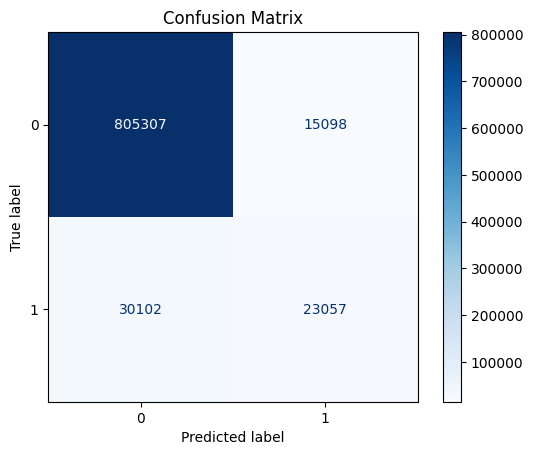

In [87]:
cr_new_features = classification_report(y_val, y_pred)
print("Classification Report:")
print(cr_new_features)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_val, y_pred)
cm_dt_with_new_features = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
cm_dt_with_new_features.plot(cmap="Blues", values_format='d')

import os
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_dir = f"Outputs/output_{timestamp}"
os.makedirs(output_dir, exist_ok=True)
image_path = os.path.join(output_dir, 'Confusion Matrix.png')

import matplotlib.pyplot as plt
plt.title('Confusion Matrix')
plt.savefig(image_path, dpi=300, bbox_inches='tight')

class_report_path = os.path.join(output_dir, 'Classification_report.txt')
with open(class_report_path, 'w') as f:
	f.write(cr_new_features)

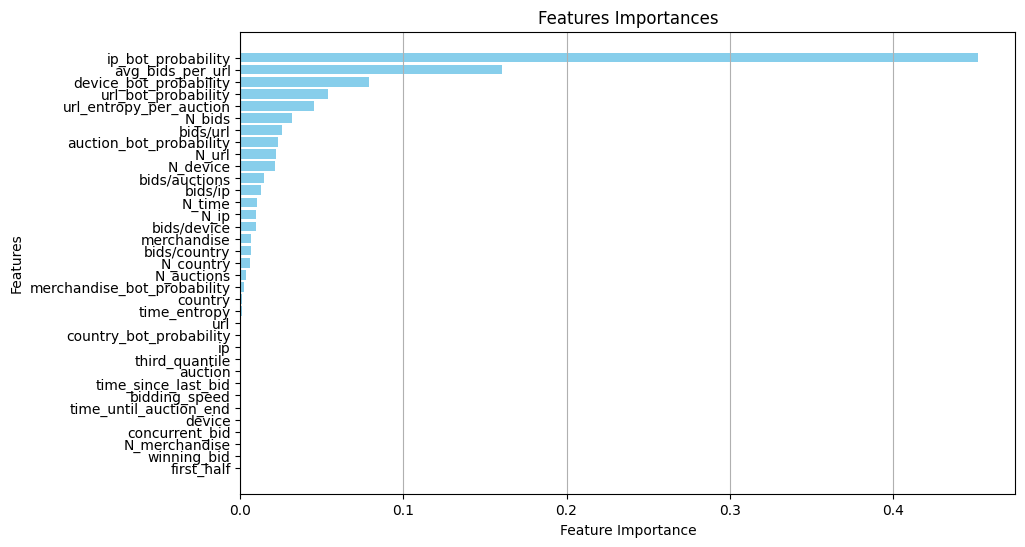

In [88]:
import numpy as np

# Ottieni le importanze delle feature
feature_importances = model.feature_importances_

# Ordina le feature per importanza decrescente
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = X_train.columns[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in DecisionTreeClassifier")
plt.gca().invert_yaxis()  # Inverti l'asse Y per avere la feature più importante in alto
plt.grid(axis='x')

fea_importance_path = os.path.join(output_dir, 'Feature_importances.png')
plt.title('Features Importances')
plt.savefig(fea_importance_path, dpi=300, bbox_inches='tight')

## Count for each bidder 
- count for each bidder, how many of its bids are labelled as bot.

In [98]:
# First, reinsert the 'encoded_bidder_id' column
print(df_val_encoded_bidder_id.shape)
print(y_pred.shape)

(873564, 1)
(873564,)


In [101]:
df_results = pd.DataFrame({
	"encoded_bidder_id": df_val_encoded_bidder_id["encoded_bidder_id"],
	"y_pred": y_pred
})
df_results

,encoded_bidder_id,y_pred
0,13,0
1,13,0
2,13,0
3,13,0
4,13,0
...,...,...
873559,6592,0
873560,6592,1
873561,6592,1
873562,6610,1


In [114]:
bot_bids_per_bidder = df_results.groupby("encoded_bidder_id")["y_pred"].value_counts().unstack(fill_value=0)
bot_bids_per_bidder = bot_bids_per_bidder.rename(columns={0: "human_bids", 1: "bot_bids"}).reset_index()
bot_bids_per_bidder

y_pred,encoded_bidder_id,human_bids,bot_bids
0,13,84319,0
1,33,3379,0
2,68,17,1148
3,76,63,0
4,82,294,0
...,...,...,...
592,6570,1,0
593,6587,1,0
594,6592,171,12
595,6610,0,1


In [115]:
# Final outcome for each bidder
bot_bids_per_bidder["outcome_from_bids"] = bot_bids_per_bidder["bot_bids"] > bot_bids_per_bidder["human_bids"]
bot_bids_per_bidder["outcome_from_bids"] = bot_bids_per_bidder["outcome_from_bids"].astype(int)
bot_bids_per_bidder

y_pred,encoded_bidder_id,human_bids,bot_bids,outcome_from_bids
0,13,84319,0,0
1,33,3379,0,0
2,68,17,1148,1
3,76,63,0,0
4,82,294,0,0
...,...,...,...,...
592,6570,1,0,0
593,6587,1,0,0
594,6592,171,12,0
595,6610,0,1,1


### Compare final results with bidder dataset

In [116]:
df_compare = bidder.merge(bot_bids_per_bidder, on="encoded_bidder_id", how="inner").fillna(0)
df_compare["outcome_match"] = (df_compare["outcome"] == (df_compare["outcome_from_bids"] > 0).astype(int))
df_compare

,payment_account,address,outcome,encoded_bidder_id,human_bids,bot_bids,outcome_from_bids,outcome_match
0,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0,2397,3,0,0,True
1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0,238,155,0,0,True
2,bf1c3151cc309308077ad0ccb99779ad12apw,31b95425d178b89fd7306762bb48bfb5n04sj,0,5346,2,0,0,True
3,879c7091fb98052b8ea2f0cd41fe50a3ht0be,7f9e09d47507cf6432086dd4f53814fem7jm5,0,4987,2,0,0,True
4,a3d2de7675556553a5f08e4c88d2c228wx3vf,00de21ff3627811075faf2a3a0880053yi40s,0,6557,2,0,0,True
...,...,...,...,...,...,...,...,...
592,bc9946b1f2e0472230f146d0d6f0960757ena,0f94f4b9ff9f35652c44764503c4b997dwclr,0,4024,39,0,0,True
593,a3d2de7675556553a5f08e4c88d2c228ye49k,fbb8e5bcfd1aee1d4a13606e9e372874u1i6r,0,6360,1,0,0,True
594,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0,6495,1,0,0,True
595,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0,2209,2,0,0,True


In [120]:
# Conta i casi in cui entrambi sono 1
both_one_count = ((df_compare["outcome"] == 1) & (df_compare["outcome_from_bids"] > 0)).sum()

# Totale righe nel dataset
total = (df_compare["outcome"] == 1).sum()

# Percentuale
percentage = (both_one_count / total) * 100 if total > 0 else 0

# Stampa i risultati
print(f"🔹 Entrambi 1: {both_one_count} ({percentage:.2f}%)")


🔹 Entrambi 1: 17 (54.84%)


In [ ]:
# df_combined = pd.concat([df_train, df_val], axis=0)
# df_combined

,auction,merchandise,device,country,ip,url,N_bids,N_auctions,N_merchandise,N_device,...,winning_bid,first_half,third_quantile,outcome,device_bot_probability,url_bot_probability,ip_bot_probability,auction_bot_probability,merchandise_bot_probability,country_bot_probability
0,4307,4,1,84,1821800,974753,19988,594,1,1029,...,0,1,0,0,0.070339,0.000000,0.237452,0.239462,0.000000,0.178462
1,1293,4,3323,15,493719,1553590,19988,594,1,1029,...,0,1,0,0,0.053358,0.238986,0.000000,0.264296,0.000000,0.025528
2,4307,4,2774,84,2061457,906375,19988,594,1,1029,...,0,1,0,0,0.043500,0.000000,0.000000,0.239462,0.000000,0.178462
3,8253,4,3104,84,1174792,1395868,19988,594,1,1029,...,0,1,0,0,0.086407,0.000000,0.000000,0.235852,0.000000,0.178462
4,7225,4,5170,84,363281,70211,19988,594,1,1029,...,0,1,0,0,0.055096,0.000000,0.000000,0.210082,0.000000,0.178462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873559,2124,5,1334,10,2103330,1553590,183,16,1,2,...,0,0,1,1,0.031343,0.061705,1.000000,0.800000,0.016983,0.308878
873560,2124,5,1334,10,2103330,1388870,183,16,1,2,...,0,0,1,1,0.031343,1.000000,1.000000,0.800000,0.016983,0.308878
873561,10227,5,1334,10,2103330,1388870,183,16,1,2,...,1,0,1,1,0.031343,1.000000,1.000000,1.000000,0.016983,0.308878
873562,8324,6,557,81,1235073,1269224,1,1,1,1,...,0,0,1,1,0.018251,1.000000,1.000000,0.009283,0.009318,0.067055


In [ ]:
# from fep import FEP, load_features
# pipeline = FEP("on_bids.csv")
# pipeline.save_features(df_combined)